In [224]:
import os 
path ="/Users/ambarruiz/Documents/2019-AI-Internship"
os.chdir(path)
os.getcwd()

'/Users/ambarruiz/Documents/2019-AI-Internship'

In [225]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [226]:
data = pd.read_csv('stocks.csv')
data ['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data = data.set_index(['Date'])


In [227]:
#from datetime import datetime
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-06-01  241.970001  243.380005  241.639999  243.360001  233.122589   
2017-06-02  243.419998  244.350006  243.080002  244.169998  233.898560   
2017-06-05  243.970001  244.300003  243.759995  243.990005  233.726135   
2017-06-06  243.339996  243.979996  243.119995  243.210007  232.978943   
2017-06-07  243.600006  243.919998  242.830002  243.660004  233.410004   

              Volume  
Date                  
2017-06-01  68962000  
2017-06-02  88666100  
2017-06-05  44698800  
2017-06-06  50375400  
2017-06-07  54144300  


In [228]:
# Features construction 
data['Open-Close'] = (data.Open - data.Close)/data.Open
data['High-Low'] = (data.High - data.Low)/data.Low
data['percent_change'] = data['Adj Close'].pct_change()
data['std_3'] = data['percent_change'].rolling(3).std()
data['ret_3'] = data['percent_change'].rolling(3).mean()
data.dropna(inplace=True)
# X is the input variable

X = data[['Open-Close', 'High-Low', 'std_3', 'ret_3']]


# Y is the target or output variable

y = np.where(data['Adj Close'].shift(-1) > data['Adj Close'], 1, -1)

In [229]:
# Total dataset length
dataset_length = data.shape[0]
# Training dataset length

split = int(dataset_length * 0.75)

split

186

In [230]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
# Print the size of the train and test dataset

print(X_train.shape, X_test.shape)

print(y_train.shape, y_test.shape)

(186, 4) (63, 4)
(186,) (63,)


In [231]:
clf = RandomForestClassifier(random_state=3)

In [232]:
# Create the model on train dataset
model = clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [233]:
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  53.96825396825397


In [234]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.55      0.53      0.54        32
           1       0.53      0.55      0.54        31

   micro avg       0.54      0.54      0.54        63
   macro avg       0.54      0.54      0.54        63
weighted avg       0.54      0.54      0.54        63



In [235]:
data['strategy_returns'] = data.percent_change.shift(-1) * model.predict(X)

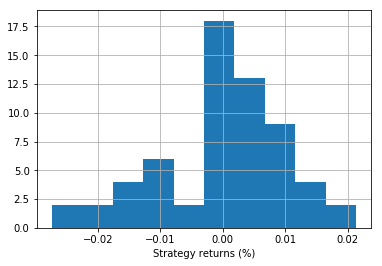

In [236]:
%matplotlib inline
import matplotlib.pyplot as plt
data.strategy_returns[split:].hist()
plt.xlabel('Strategy returns (%)')
plt.show()


#Output variable: If tomorrow’s close price is greater than today's close price then 
#the output variable is set to 1 and otherwise set to -1. 1 indicates to buy the stock
#and -1 indicates to sell the stock




#Daily returns histogram

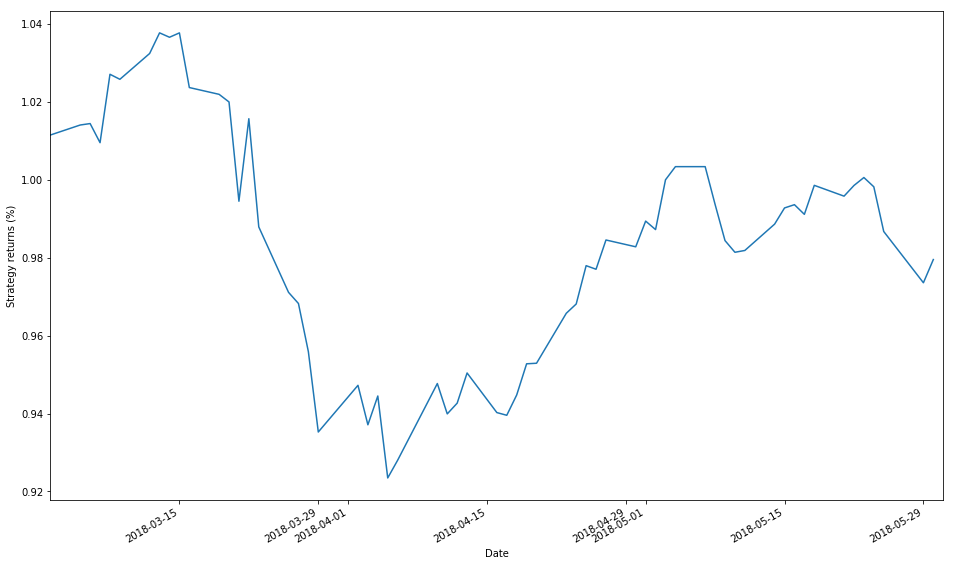

In [237]:

import matplotlib.pylab as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,10

(data.strategy_returns[split:]+1).cumprod().plot()
plt.ylabel('Strategy returns (%)')
plt.show()

##The output displays the strategy returns and daily returns according to the code for 
#the Random Forest Classifier.